In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
cd "Colab Notebooks/"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# cd wa_522_proj

In [ ]:
path = '/MyDrive/Colab Notebooks/wa_522_proj/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import torch.backends
from torch.nn import Module, Linear, ReLU, Sequential
from torch.optim import SGD
from torch.nn import MSELoss

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.backends.cudnn.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device = torch.device("cpu")
print("Using device:", device)

Using device: cpu


In [ ]:
plt.rcParams['figure.figsize'] = (5,5)

# Generate Data

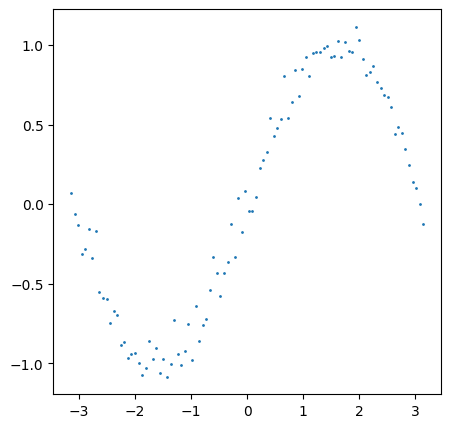

In [ ]:
f = np.sin

x = np.linspace(- np.pi, np.pi, 100)
eps = np.random.normal(0, 0.1, 100)

y = f(x) + eps

plt.scatter(x, y, s=1)
plt.show()

x_train = x
y_train = y

In [ ]:
# Create Data Set
x = torch.tensor(x, dtype=torch.float32, device=device).reshape(-1, 1)
y = torch.tensor(y, dtype=torch.float32, device=device).reshape(-1, 1)

# Create Data Loader
batch_size = 10
data = torch.utils.data.TensorDataset(x, y)
loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

# Train Model

In [ ]:
class NNModel(Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(NNModel, self).__init__()

        self.num_layers = num_layers

        self.linear_in = Linear(input_size, hidden_size)
        self.linear_out = Linear(hidden_size, output_size)
        self.relu = ReLU()

        mids = [Linear(hidden_size, hidden_size) for _ in range(num_layers)]
        self.seq = Sequential(*[layer for sublist in zip(mids, [ReLU()]*num_layers) for layer in sublist])
        
    def forward(self, x):
        out = self.linear_in(x)
        out = self.seq(out)
        out = self.relu(out)
        out = self.linear_out(out)
        return out
      

def initialize(fhat):
    # Initialize weights to be close to 0
    for param in fhat.parameters():
        param.data.normal_(0, 0.01)

def train(fhat):
    # Training Loop
    optimizer = SGD(fhat.parameters(), lr=0.01)
    reg = 0.001
    criterion = MSELoss()
    epochs = 1001

    losses = []
    for epoch in range(epochs):
        for x, y in loader:
            optimizer.zero_grad()
            yhat = fhat(x)
            
            loss = criterion(yhat, y) + reg * (torch.sum(fhat.linear_in.weight ** 2) + torch.sum(fhat.linear_out.weight ** 2))
            for layer in fhat.seq[::2]:
              loss += reg * torch.sum(layer.weight**2)

            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print("Epoch: %d, Loss: %f" % (epoch, loss.item()))
        losses.append(loss.item())
    
    return np.array(losses)
        

In [ ]:
fhat1 = NNModel(1, 1000, 1, 1).to(device)
fhat1.load_state_dict(torch.load('models1k/model_1.pt'))

fhat2 = NNModel(1, 1000, 2, 1).to(device)
fhat2.load_state_dict(torch.load('models1k/model_2.pt'))

fhat3 = NNModel(1, 1000, 3, 1).to(device)
fhat3.load_state_dict(torch.load('models1k/model_3.pt'))

fhat4 = NNModel(1, 1000, 4, 1).to(device)
fhat4.load_state_dict(torch.load('models1k/model_4.pt'))

fhat5 = NNModel(1, 1000, 5, 1).to(device)
fhat5.load_state_dict(torch.load('models1k/model_5.pt'))

fhat6 = NNModel(1, 1000, 6, 1).to(device)
fhat6.load_state_dict(torch.load('models1k/model_6.pt'))

fhat7 = NNModel(1, 1000, 7, 1).to(device)
fhat7.load_state_dict(torch.load('models1k/model_7.pt'))

fhat8 = NNModel(1, 1000, 8, 1).to(device)
fhat8.load_state_dict(torch.load('models1k/model_8.pt'))

fhat9 = NNModel(1, 1000, 9, 1).to(device)
fhat9.load_state_dict(torch.load('models1k/model_9.pt'))

fhat10 = NNModel(1, 1000, 10, 1).to(device)
fhat10.load_state_dict(torch.load('models1k/model_10.pt'))

fhat11 = NNModel(1, 1000, 11, 1).to(device)
fhat11.load_state_dict(torch.load('models1k/model_11.pt'))

fhat12 = NNModel(1, 1000, 12, 1).to(device)
fhat12.load_state_dict(torch.load('models1k/model_12.pt'))

fhat13 = NNModel(1, 1000, 13, 1).to(device)
fhat13.load_state_dict(torch.load('models1k/model_13.pt'))

fhat14 = NNModel(1, 1000, 14, 1).to(device)
fhat14.load_state_dict(torch.load('models1k/model_14.pt'))

fhat15 = NNModel(1, 1000, 15, 1).to(device)
fhat15.load_state_dict(torch.load('models1k/model_15.pt'))

fhat16 = NNModel(1, 1000, 16, 1).to(device)
fhat16.load_state_dict(torch.load('models1k/model_16.pt'))

fhat17 = NNModel(1, 1000, 17, 1).to(device)
fhat17.load_state_dict(torch.load('models1k/model_17.pt'))

fhat18 = NNModel(1, 1000, 18, 1).to(device)
fhat18.load_state_dict(torch.load('models1k/model_18.pt'))

fhat19 = NNModel(1, 1000, 19, 1).to(device)
fhat19.load_state_dict(torch.load('models1k/model_19.pt'))

fhat20 = NNModel(1, 1000, 20, 1).to(device)
fhat20.load_state_dict(torch.load('models1k/model_20.pt'))

my_models = [fhat1, fhat2, fhat3, fhat4, fhat5, fhat6, fhat7, fhat8, fhat9, fhat10, fhat11, fhat12, fhat13, fhat14, fhat15, fhat16, fhat17, fhat18, fhat19, fhat20]

In [ ]:
train_l1 = np.load('models2/loss_1.npy')
train_l2 = np.load('models2/loss_2.npy')
train_l3 = np.load('models2/loss_3.npy')
train_l4 = np.load('models2/loss_4.npy')
train_l5 = np.load('models2/loss_5.npy')
train_l6 = np.load('models2/loss_6.npy')
train_l7 = np.load('models2/loss_7.npy')
train_l8 = np.load('models2/loss_8.npy')
train_l9 = np.load('models2/loss_9.npy')
train_l10 = np.load('models2/loss_10.npy')
train_l11 = np.load('models2/loss_11.npy')
train_l12 = np.load('models2/loss_12.npy')
train_l13 = np.load('models2/loss_13.npy')
train_l14 = np.load('models2/loss_14.npy')
train_l15 = np.load('models2/loss_15.npy')
train_l16 = np.load('models2/loss_16.npy')
train_l17 = np.load('models2/loss_17.npy')
train_l18 = np.load('models2/loss_18.npy')
train_l19 = np.load('models2/loss_19.npy')
train_l20 = np.load('models2/loss_20.npy')

# Test the suckers

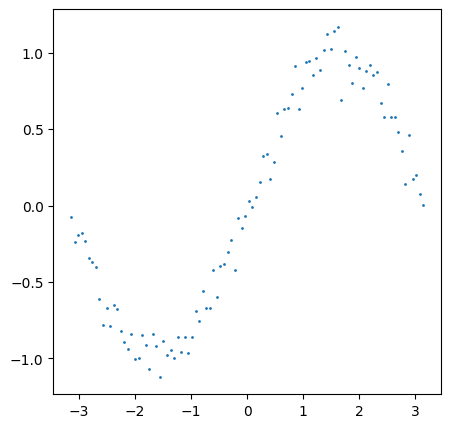

In [ ]:
dom_test = np.linspace(-np.pi, np.pi, 100)
eps_test = np.random.normal(0, 0.1, 100)

range_test = f(dom_test) + eps_test

plt.scatter(dom_test, range_test, s=1)
plt.show()

In [ ]:
# Create Data Set
x_test = torch.tensor(dom_test, dtype=torch.float32, device=device).reshape(-1, 1)
y_test = torch.tensor(range_test, dtype=torch.float32, device=device).reshape(-1, 1)

# Create Data Loader
batch_size = 10
data_test = torch.utils.data.TensorDataset(x_test, y_test)
loader_test = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

In [ ]:
preds = []
diffs = []

for fhat in my_models:
  preds.append(fhat(x_test).cpu().detach().numpy())
  diffs.append(preds[-1]-f(dom_test))

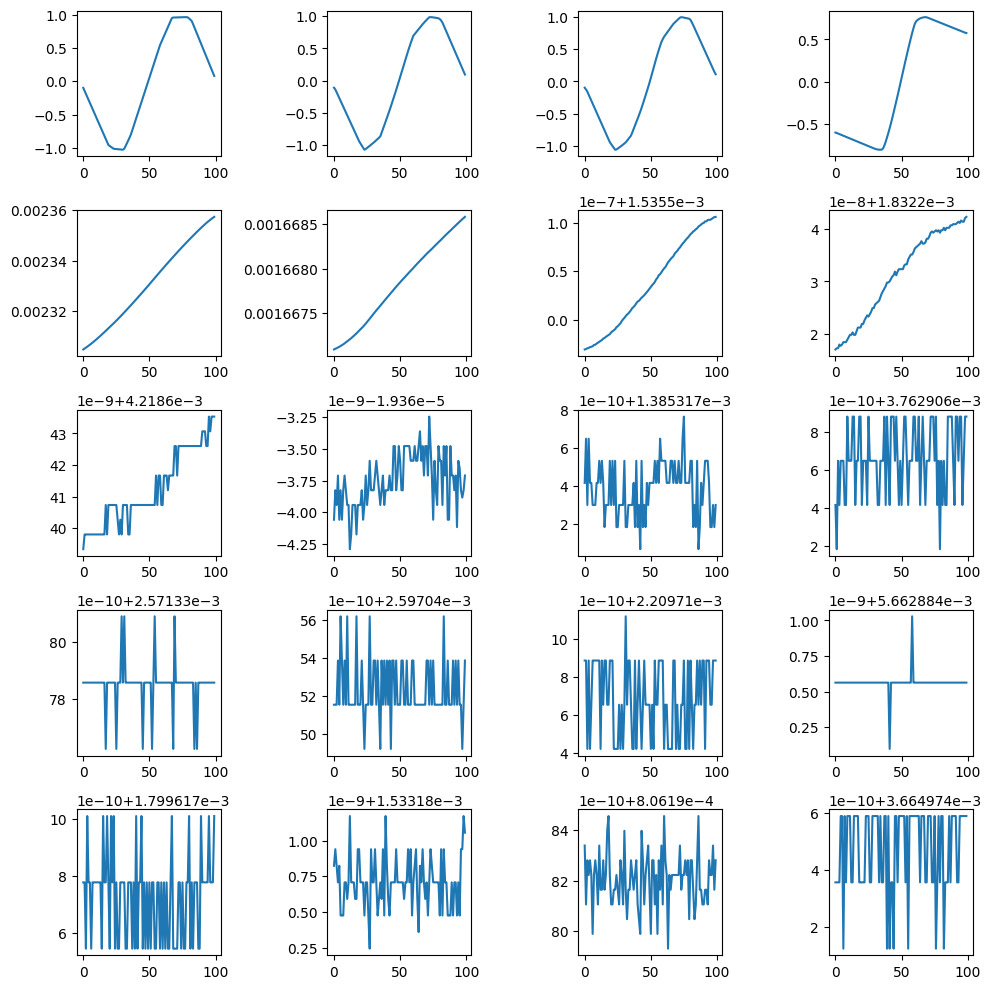

In [ ]:
plt.figure(figsize=(10,10))

for i, pred in enumerate(preds):
  plt.subplot(5,4,i+1)
  plt.plot(pred)

plt.tight_layout()
plt.show()

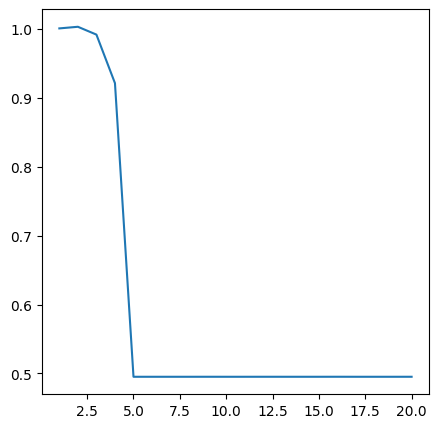

In [ ]:
my_MSE = [np.mean(diff**2) for diff in diffs]
plt.plot(np.arange(1,21),my_MSE)
plt.show()

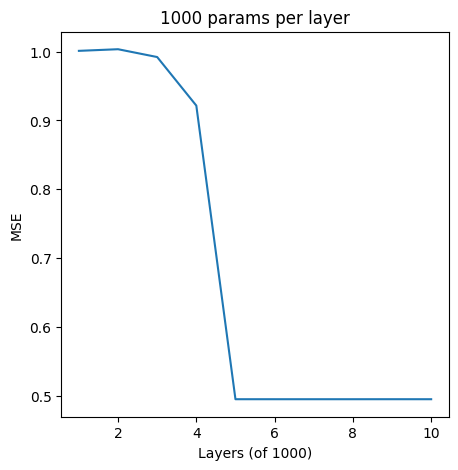

In [ ]:
my_MSE = [np.mean(diff**2) for diff in diffs[:10]]
plt.plot(np.arange(1,11),my_MSE)
plt.title('1000 params per layer')
plt.xlabel('Layers (of 1000)')
plt.ylabel('MSE')
plt.show()

# 10000 for 1 to 5 layers

In [ ]:
dom = np.linspace(-np.pi, np.pi, 1000)
x = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y = torch.tensor(np.sin(dom), dtype=torch.float32, device=device).reshape(-1, 1)
pred = np.squeeze(fhat20(x).cpu().detach().numpy())
diff = pred - f(dom)

plt.hist(pred-f(dom), bins=100, density=True)
plt.show()

In [ ]:
pred1 = np.squeeze(fhat1(x_test).cpu().detach().numpy())
diff1 = pred1 - f(dom_test)

pred2 = np.squeeze(fhat2(x_test).cpu().detach().numpy())
diff2 = pred2 - f(dom_test)

pred3 = np.squeeze(fhat3(x_test).cpu().detach().numpy())
diff3 = pred3 - f(dom_test)

pred4 = np.squeeze(fhat4(x_test).cpu().detach().numpy())
diff4 = pred4 - f(dom_test)

pred5 = np.squeeze(fhat5(x_test).cpu().detach().numpy())
diff5 = pred5 - f(dom_test)

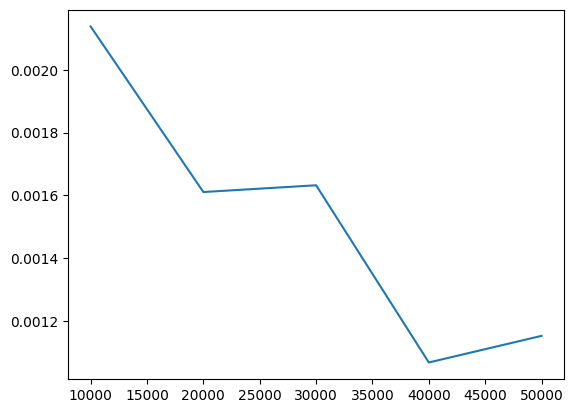

In [ ]:
plt.plot(np.arange(1,6)*10000, [np.mean(diff1**2), np.mean(diff2**2), np.mean(diff3**2), np.mean(diff4**2), np.mean(diff5**2)])
plt.show()

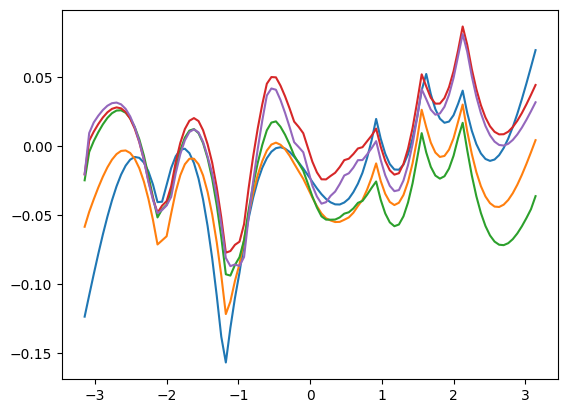

In [ ]:
plt.plot(dom_test, diff1, label='1 layer')
plt.plot(dom_test, diff2, label='2 layer')
plt.plot(dom_test, diff3, label='3 layer')
plt.plot(dom_test, diff4, label='4 layer')
plt.plot(dom_test, diff5, label='5 layer')
plt.legend()
plt.show()

In [ ]:
#n_params = np.arange(100, 20001, 100)
"""n_layers = np.arange(1,21)

for l in n_layers:
    print(f"Training model with {l} layers")
    fhat = NNModel(1, 1000, l, 1).to(device)
    initialize(fhat)
    loss = train(fhat)

    # Save the model
    my_dict = fhat.state_dict()
    torch.save(my_dict, f"models2/model_{l}.pt")

    # Save the loss
    np.save(f"models2/loss_{l}.npy", loss)

    print()"""

Training model with 1 layers
Epoch: 0, Loss: 0.700355
Epoch: 100, Loss: 0.201726
Epoch: 200, Loss: 0.185651
Epoch: 300, Loss: 0.131759
Epoch: 400, Loss: 0.105564
Epoch: 500, Loss: 0.097960
Epoch: 600, Loss: 0.097333
Epoch: 700, Loss: 0.092428
Epoch: 800, Loss: 0.091310
Epoch: 900, Loss: 0.085396
Epoch: 1000, Loss: 0.081806

Training model with 2 layers
Epoch: 0, Loss: 0.800991
Epoch: 100, Loss: 0.380413
Epoch: 200, Loss: 0.229835
Epoch: 300, Loss: 0.227479
Epoch: 400, Loss: 0.201798
Epoch: 500, Loss: 0.192558
Epoch: 600, Loss: 0.177329
Epoch: 700, Loss: 0.162300
Epoch: 800, Loss: 0.156344
Epoch: 900, Loss: 0.155814
Epoch: 1000, Loss: 0.153230

Training model with 3 layers
Epoch: 0, Loss: 0.905141
Epoch: 100, Loss: 0.717680
Epoch: 200, Loss: 0.395163
Epoch: 300, Loss: 0.377695
Epoch: 400, Loss: 0.357268
Epoch: 500, Loss: 0.293246
Epoch: 600, Loss: 0.261515
Epoch: 700, Loss: 0.247677
Epoch: 800, Loss: 0.233754
Epoch: 900, Loss: 0.223528
Epoch: 1000, Loss: 0.221030

Training model with 4 